# Data Gathering

In [72]:
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd


hades = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}
def scrape_detik(url, hal, label):
    data = []
    a = 1
    for page in range(1, hal):
        page_url = f'{url}&page={page}'
        ge = req.get(page_url).text
        sop = bs(ge, 'lxml')
        li = sop.find('div', class_='list media_rows list-berita')
        lin = li.find_all('article')
        for x in lin:
            link = x.find('a')['href']
            ge_ = req.get(link).text
            sop_ = bs(ge_, 'lxml')
            content = sop_.find_all('div', class_='detail__body-text itp_bodycontent')
            for x in content:
                x = x.find_all('p')
                y = [y.text for y in x]
                content_ = ''.join(y).replace('\n', '').replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '')
                data.append([link, content_, label])
                print(f'done[{a}] > {link}')
                a += 1
                #limit just 100 entries
                # Check if the maximum data limit is reached
                if a > 100:
                    break

            # Check if the maximum data limit is reached
            if a > 100:
                break

    # Create a Pandas DataFrame
    df = pd.DataFrame(data, columns=['Link', 'Content', 'Label'])
    return df

Scrape the dataset (disini saya hanya menginginkan 101 entries tiap label)

**Scrape setiap label dengan menggunakan search**


- **Label Politik (keyword: 'politik')**

In [73]:
url_to_scrape_politik = 'https://www.detik.com/search/searchnews?query=politik&sortby=time'
number_of_pages = 15
label = 'Politik'

# Call the function with the URL, number of pages, and label
result_df_politik = scrape_detik(url_to_scrape_politik, number_of_pages, label)

done[1] > https://news.detik.com/pemilu/d-7041903/bamsoet-wanti-wanti-potensi-konflik-horizontal-jelang-pemilu-2024
done[2] > https://www.detik.com/jatim/berita/d-7041951/khofifah-buka-suara-soal-emil-dardak-jadi-jubir-gibran
done[3] > https://news.detik.com/pemilu/d-7041914/disdik-tepis-daftar-afiliasi-politik-pegawai-sdn-sukoharjo-kita-asn-netral
done[4] > https://news.detik.com/internasional/d-7041910/erdogan-sebut-israel-negara-teroris-netanyahu-balas-gini
done[5] > https://news.detik.com/pemilu/d-7041902/beredar-daftar-afiliasi-politik-pegawai-sdn-di-sukhoarjo-bawaslu-telusuri
done[6] > https://news.detik.com/pemilu/d-7041891/resmikan-posko-bersama-caleg-golkar-bamsoet-beri-pesan-soal-pemilu
done[7] > https://www.detik.com/jabar/berita/d-7041879/doa-dari-warga-pangandaran-untuk-palestina
done[8] > https://news.detik.com/pemilu/d-7041872/anies-soal-pakta-pj-bupati-sorong-jangan-pakai-negara-demi-aspirasi-pribadi
done[9] > https://www.detik.com/jateng/berita/d-7041838/muncul-daftar-

In [74]:
result_df_politik

,Link,Content,Label
0,https://news.detik.com/pemilu/d-7041903/bamsoe...,Ketua MPR RI Bambang Soesatyo (Bamsoet) mengin...,Politik
1,https://www.detik.com/jatim/berita/d-7041951/k...,Gubernur Jawa Timur Khofifah Indar Parawansa b...,Politik
2,https://news.detik.com/pemilu/d-7041914/disdik...,Sebuah unggahan berisi daftar afiliasi politik...,Politik
3,https://news.detik.com/internasional/d-7041910...,Presiden Turki Recep Tayyip Erdogan dalam pida...,Politik
4,https://news.detik.com/pemilu/d-7041902/bereda...,Unggahan berisi daftar pilihan politik pegawai...,Politik
...,...,...,...
96,https://finance.detik.com/tips-dan-trik/d-7040...,Pekerja Migran Indonesia (PMI) diimbau lebih w...,Politik
97,https://www.detik.com/jatim/berita/d-7039900/s...,Terusan Suez resmi dibuka pada 17 November 186...,Politik
98,https://www.detik.com/jabar/berita/d-7039891/j...,Badan Kesatuan Bangsa dan Politik (Kesbangpol)...,Politik
99,https://finance.detik.com/berita-ekonomi-bisni...,Serangan Israel terhadap Gaza masih belum berh...,Politik


- **Label Hiburan (keyword: 'entertaiment')**

In [75]:
url_to_scrape_hiburan= 'https://www.detik.com/search/searchnews?query=entertaiment&sortby=time'
number_of_pages = 20
label = 'Hiburan'

# Call the function with the URL, number of pages, and label
result_df_hiburan = scrape_detik(url_to_scrape_hiburan, number_of_pages, label)

done[1] > https://sport.detik.com/raket/d-7036863/taufik-hidayat-bakal-tanding-tenis-mulyo-handoyo-direkrut-lagi
done[2] > https://sport.detik.com/sport-lain/d-6990044/atlet-jetski-aqsa-aswar-bakal-tanding-tinju-banting-setir
done[3] > https://hot.detik.com/celeb/d-6969372/raffi-ahmad-ketakutan-uji-nyali-di-rumah-hantu
done[4] > https://news.detik.com/detiknews/d-6948512/kecelakaan-truk-maut-exit-tol-bawen-semarang-hingga-konser-smtown-di-jakarta
done[5] > https://www.detik.com/sumut/berita/d-6944615/profil-sunwoo-the-boyz-dan-fakta-menariknya-si-rapper-yang-jago-main-bola
done[6] > https://food.detik.com/info-kuliner/d-6931132/5-fakta-nasi-goreng-upiak-umkm-yang-disuntik-modal-raffi-ahmad-dan-nagita-slavina
done[7] > https://www.detik.com/jatim/berita/d-6919530/padi-reborn-cak-sodiq-akan-meriahkan-opening-ceremony-porprov-jatim-2023
done[8] > https://www.detik.com/jabar/jabar-gaskeun/d-6896645/berkenalan-dengan-fiksi-youtuber-sunda-yang-kini-terjun-ke-dunia-musik
done[9] > https://spo

In [76]:
result_df_hiburan

,Link,Content,Label
0,https://sport.detik.com/raket/d-7036863/taufik...,Legenda hidup bulutangkis Taufik Hidayat bakal...,Hiburan
1,https://sport.detik.com/sport-lain/d-6990044/a...,Aqsa Sutan Aswar dijadwalkan naik ring tinju p...,Hiburan
2,https://hot.detik.com/celeb/d-6969372/raffi-ah...,Raffi Ahmad belum lama ini menjadi salah satu ...,Hiburan
3,https://news.detik.com/detiknews/d-6948512/kec...,Kecelakaan maut terjadi di persimpangan exit T...,Hiburan
4,https://www.detik.com/sumut/berita/d-6944615/p...,"Kim Sunwoo, akrab disapa Sunwoo, merupakan sal...",Hiburan
...,...,...,...
96,https://hot.detik.com/kpop/d-5776226/savage-ae...,aespa kembali meraih prestasi hanya dalam 11 b...,Hiburan
97,https://www.detik.com/edu/edutainment/d-576474...,"Kabar baik bagi para KPopers, lowongan kerja a...",Hiburan
98,https://hot.detik.com/celeb/d-5745863/indra-th...,"Lama tak terdengar kabarnya, Indra 'The Titans...",Hiburan
99,https://hot.detik.com/kpop/d-5708722/profil-5-...,Kabar terbaru artis Korea yang terpapar virus ...,Hiburan


- **Label Olahraga (keyword: 'sports')**

In [77]:
url_to_scrape_olaraga= 'https://www.detik.com/search/searchnews?query=sports&sortby=time'
number_of_pages = 16
label = 'Olahraga'

# Call the function with the URL, number of pages, and label
result_df_olahraga = scrape_detik(url_to_scrape_olaraga, number_of_pages, label)

done[1] > https://sport.detik.com/sepakbola/bola-dunia/d-7039454/garnacho-dicoret-timnas-argentina-scaloni-beri-penjelasan
done[2] > https://sport.detik.com/sport-lain/d-7039346/minahasa-gelar-ajang-olahraga-air-diikuti-7-negara
done[3] > https://oto.detik.com/berita/d-7038088/perhatian-ini-lokasi-parkir-alternatif-nonton-konser-coldplay-di-gbk
done[4] > https://www.detik.com/jabar/kuliner/d-7035904/cara-bagi-kopi-bertahan-saat-pandemi-hingga-sukses-buka-puluhan-outlet
done[5] > https://sport.detik.com/sepakbola/liga-inggris/d-7037349/gara-gara-unggahan-hitler-dan-netanyahu-anggota-fa-diskors
done[6] > https://sport.detik.com/raket/d-7036852/taufik-hidayat-soal-tim-pokja-olimpiade-tak-apa-terlambat-daripada
done[7] > https://hot.detik.com/music/d-7036431/konser-morrissey-di-jakarta-batal-promotor-jelaskan-alasan-proses-refund
done[8] > https://sport.detik.com/sepakbola/liga-inggris/d-7035509/aston-villa-bisa-saja-finis-di-atas-mu-tapi
done[9] > https://hot.detik.com/kmovie/d-7034355/so

In [225]:
result_df_olahraga

,Link,Content,Label
0,https://sport.detik.com/sepakbola/bola-dunia/d...,Alejandro Garnacho tak dipanggil Timnas Argent...,Olahraga
1,https://sport.detik.com/sport-lain/d-7039346/m...,Minahasa bakal menggelar ajang olahraga air in...,Olahraga
2,https://oto.detik.com/berita/d-7038088/perhati...,"Band kenamaan asal Inggris, Coldplay akan meng...",Olahraga
3,https://www.detik.com/jabar/kuliner/d-7035904/...,Berjualan kopi jadi bisnis yang sedang digandr...,Olahraga
4,https://sport.detik.com/sepakbola/liga-inggris...,Asosiasi Sepakbola Inggris atau FA menjatuhkan...,Olahraga
...,...,...,...
97,https://sport.detik.com/sport-lain/d-6998981/a...,Medali emas Asian Para Games 2023 oleh Ni Made...,Olahraga
98,https://sport.detik.com/sepakbola/bola-dunia/d...,Al Ittihad mengalahkan Al Quwa Al Jawiya 1-0 d...,Olahraga
99,https://sport.detik.com/sport-lain/d-6998269/m...,Seiring dengan telah berlalunya masa pandemi C...,Olahraga
100,https://sport.detik.com/sport-lain/d-6996418/a...,Asian Para Games 2023 resmi dibuka dengan upac...,Olahraga


gabungkan menjadi 1 dataframe

In [372]:
df = pd.concat([result_df_politik[0:100], result_df_hiburan[0:100], result_df_olahraga[0:100]], ignore_index=True)

#check shape
df.shape

(300, 3)

In [373]:
df['Label'].value_counts()

Politik     100
Hiburan     100
Olahraga    100
Name: Label, dtype: int64

melihat label distribution/count

In [374]:
new_df = df.copy()

In [375]:
new_df = new_df.drop('Link', axis = 1)

# Data Preprocessing

Disini saya membuang kolom 'link' dikarenakan tidak akan digunkakan dalam keperluan model

In [376]:
new_df['Content'][0]

'Ketua MPR RI Bambang Soesatyo (Bamsoet) mengingatkan tantangan kebangsaan yang dihadapi bangsa Indonesia saat ini. Salah satunya dia mewanti-wanti terkait potensi konflik horizontal di tengah kontestasi politik.Wakil Ketua Umum Partai Golkar ini menjelaskan berdasarkan catatan sejarah setiap penyelenggaraan pemilu selalu meninggalkan residu persoalan.Karena itu dia mengajak masyarakat untuk menghindari paradigma klise pada penyelenggaraan Pemilu 2024. Menurut Bamsoet, hal tersebut dapat menjadi pemantik lahirnya konflik horizontal.\r\r\rSCROLL TO CONTINUE WITH CONTENT\r"Kontestasi politik tidak boleh memicu polarisasi masyarakat pada dua kutub-kutub yang berseberangan, baik sebelum, selama, hingga pasca penyelenggaraan Pemilu. Kita harus bercermin dari pengalaman sejarah, bahwa konflik yang terlahir dari kontestasi politik, seringkali meninggalkan trauma dan bekas luka yang lama sembuhnya," ujar Bamsoet dalam keterangannya, Jumat (17/11/2023).Hal itu dia sampaikan saat Sosialisasi Emp

Data Cleansing

In [377]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
STOPWORDS = set(stopwords.words('indonesian'))
from nltk.stem import WordNetLemmatizer

words_to_remove = ['advertisement', 'scroll', 'to', 'continue', 'with', 'content', 'getty', 'resume', 'content' , '²an','ë³']

def cleansing(df):
    stop_words = set(stopwords.words('indonesian'))

    df_clean = df.str.lower() # mengubah semua teks dalam DataFrame menjadi huruf kecil.
    df_clean = [re.sub(r'http\S+|www.\S+', '', i) for i in df_clean] # menghapus semua URL dari teks.
    df_clean = [re.sub(r'\S*\.com\S*', '', i) for i in df_clean] # menghapus domain '.com' dari teks.
    df_clean = [re.sub(r"\d+","",i )for i in df_clean] # menghapus semua angka dari teks.
    df_clean = [re.sub(r'[^\w]', ' ', i)for i in df_clean] # menghapus semua karakter non-kata dari teks.
    df_clean = [re.sub(r'\s+',' ',i)for i in df_clean] # mereplace spasi berlebih dengan spasi tunggal.
    df_clean = [re.sub(r'\#\S*', '', i) for i in df_clean] # menghapus semua hashtags dari teks.

    df_clean = [' '.join(word for word in text.split() if word not in words_to_remove) for text in df_clean] # menghapus semua kata yang berkaitan dengan iklan yang ada pada teks
    df_clean = [' '.join(word for word in text.split() if word not in STOPWORDS) for text in df_clean] # menghapus semua stop words dari teks.
    return df_clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [378]:
new_df['Clean_text'] = cleansing(new_df['Content'])

In [379]:
new_df

,Content,Label,Clean_text
0,Ketua MPR RI Bambang Soesatyo (Bamsoet) mengin...,Politik,ketua mpr ri bambang soesatyo bamsoet tantanga...
1,Gubernur Jawa Timur Khofifah Indar Parawansa b...,Politik,gubernur jawa timur khofifah indar parawansa b...
2,Sebuah unggahan berisi daftar afiliasi politik...,Politik,unggahan berisi daftar afiliasi politik pegawa...
3,Presiden Turki Recep Tayyip Erdogan dalam pida...,Politik,presiden turki recep tayyip erdogan pidatonya ...
4,Unggahan berisi daftar pilihan politik pegawai...,Politik,unggahan berisi daftar pilihan politik pegawai...
...,...,...,...
295,Ronaldo melempar pernyataan terbuka. Ia memand...,Olahraga,ronaldo melempar pernyataan terbuka memandang ...
296,Lionel Messi menjadi salah satu kandidat perai...,Olahraga,lionel messi salah kandidat peraih ballon d or...
297,Medali emas Asian Para Games 2023 oleh Ni Made...,Olahraga,medali emas asian games ni made arianti putri ...
298,Al Ittihad mengalahkan Al Quwa Al Jawiya 1-0 d...,Olahraga,al ittihad mengalahkan al quwa al jawiya match...


In [250]:
#new_df.to_csv('the data.csv', index=False)

**Data Exploration & Visualization**

In [381]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define a function to find the top words for each label based on word count
def top_words_for_each_label_count(df, label_column, text_column, top_n=5):
    label_words = {}

    # Iterate over unique labels
    for label in df[label_column].unique():

        # Filter DataFrame for the specific label
        label_df = df[df[label_column] == label]

        # Combine all text data for the label into a list
        documents_for_label = label_df[text_column].tolist()

        # Create CountVectorizer
        vectorizer = CountVectorizer()

        # Fit and transform the text data for the label
        count_matrix = vectorizer.fit_transform(documents_for_label)

        # Get feature names (words)
        feature_names = vectorizer.get_feature_names_out()
        word_counts = count_matrix.sum(axis=0).A1

        # Sort words by count in descending order
        sorted_word_indices = word_counts.argsort()[::-1]

        # Get the top N words for the label
        top_words = [feature_names[idx] for idx in sorted_word_indices[:top_n]]

        # Get the counts for the top words
        top_word_counts = [word_counts[idx] for idx in sorted_word_indices[:top_n]]

        # Store the top words and counts for the label
        label_words[label] = list(zip(top_words, top_word_counts))

    return label_words

# Find the top words and counts for each label based on word count
top_words_by_label_count = top_words_for_each_label_count(new_df, 'Label', 'Clean_text')

# Display the result
for label, top_words in top_words_by_label_count.items():
    print(f"Top 5 words and frequencies for {label}: {', '.join([f'{word} ({count})' for word, count in top_words])}")


Top 5 words and frequencies for Politik: kecamatan (567), politik (166), israel (162), pemilu (156), indonesia (144)
Top 5 words and frequencies for Hiburan: indonesia (114), orang (112), dunia (109), lesti (105), entertaiment (102)
Top 5 words and frequencies for Olahraga: gol (142), mu (133), laga (128), liga (125), city (122)


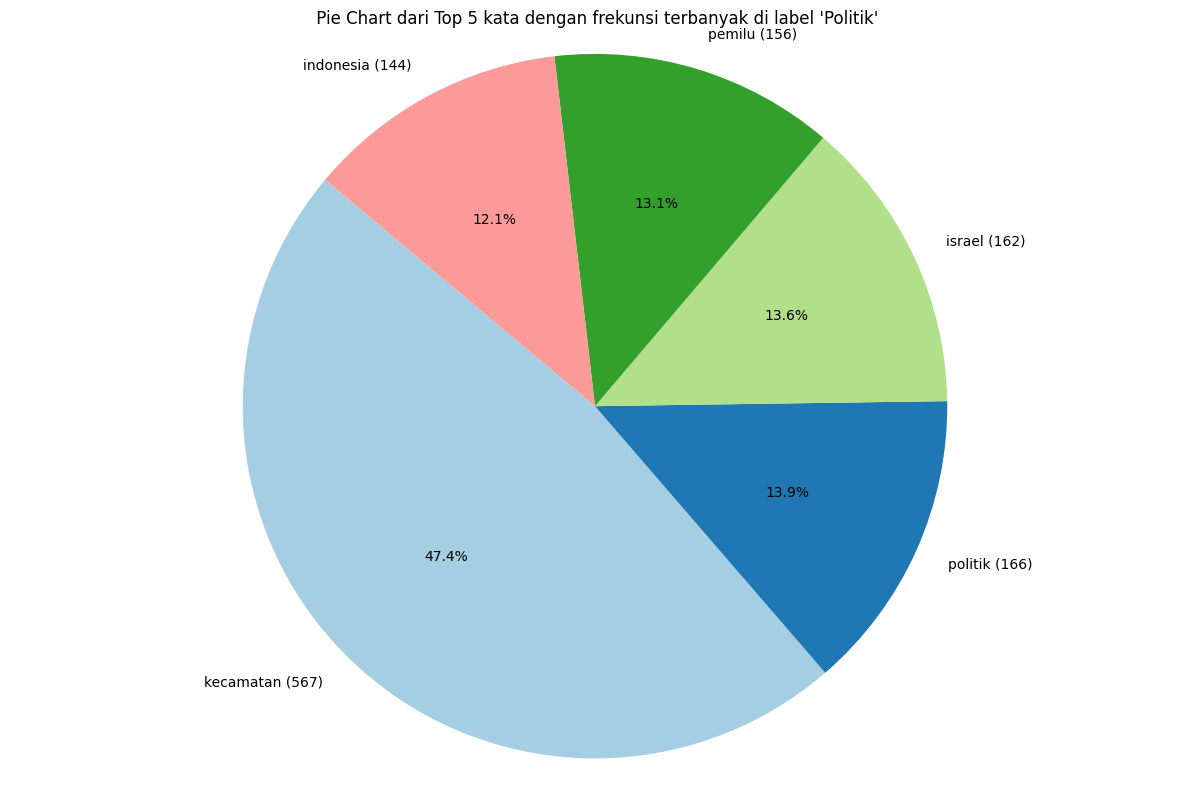

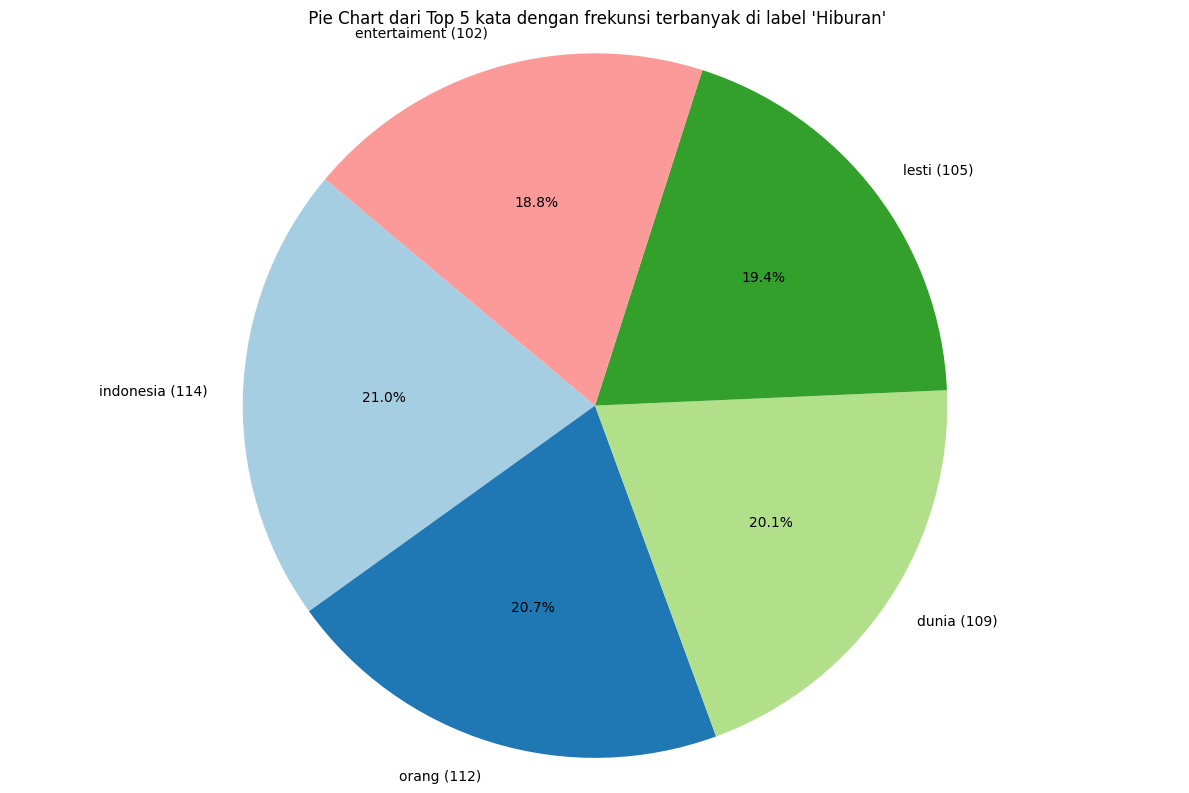

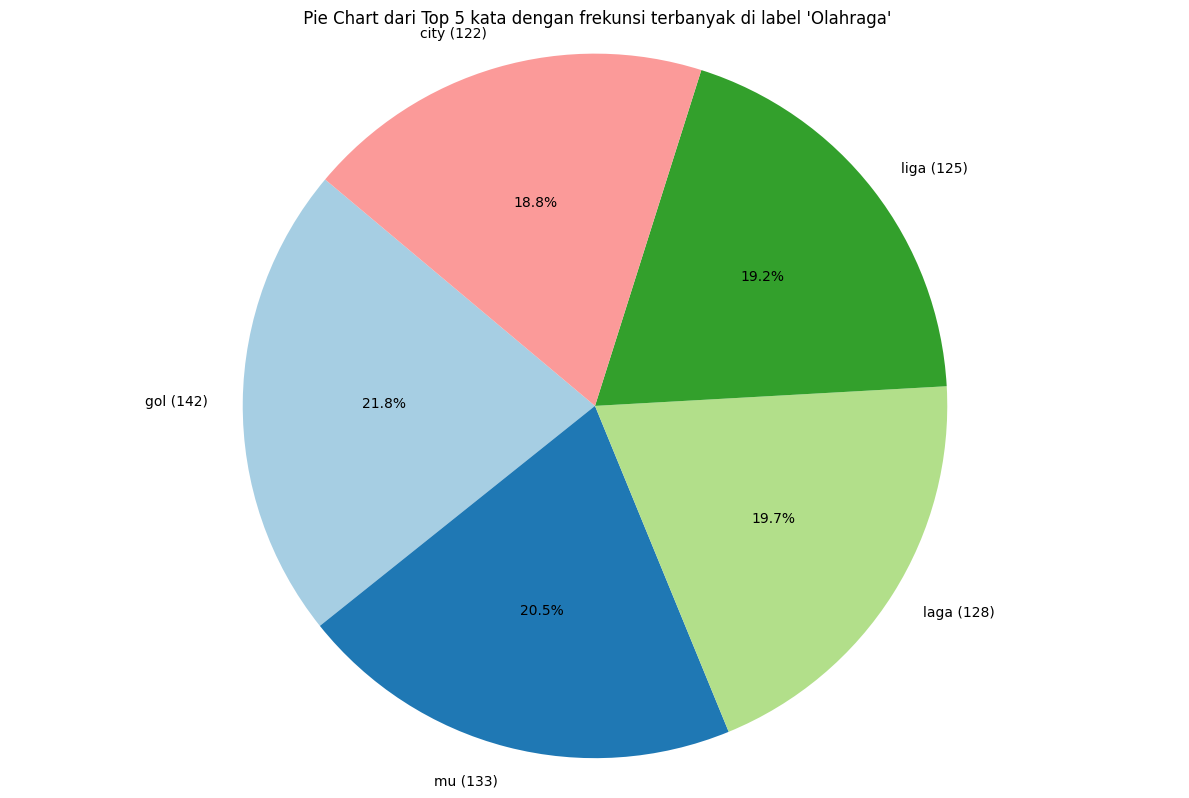

In [382]:
import matplotlib.pyplot as plt

# Create pie charts
for label, top_words in top_words_by_label_count.items():
    words, counts = zip(*top_words)

    plt.figure(figsize=(12, 8))
    plt.pie(counts, labels=[f"{word} ({count})" for word, count in zip(words, counts)],
            autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

    plt.title(f" Pie Chart dari Top 5 kata dengan frekunsi terbanyak di label '{label}'")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()


In [383]:
# Encode target/label

new_df['Label'] = new_df['Label'].map({
    'Politik' : 0,
    'Hiburan': 1,
    'Olahraga': 2,
})

#checking the results
new_df.head(5)

,Content,Label,Clean_text
0,Ketua MPR RI Bambang Soesatyo (Bamsoet) mengin...,0,ketua mpr ri bambang soesatyo bamsoet tantanga...
1,Gubernur Jawa Timur Khofifah Indar Parawansa b...,0,gubernur jawa timur khofifah indar parawansa b...
2,Sebuah unggahan berisi daftar afiliasi politik...,0,unggahan berisi daftar afiliasi politik pegawa...
3,Presiden Turki Recep Tayyip Erdogan dalam pida...,0,presiden turki recep tayyip erdogan pidatonya ...
4,Unggahan berisi daftar pilihan politik pegawai...,0,unggahan berisi daftar pilihan politik pegawai...


# Train & Test split

In [384]:
from sklearn.model_selection import train_test_split

#  80% train & 20% test
x_train, x_test, y_train, y_test = train_test_split(new_df['Clean_text'], new_df['Label'], test_size = 0.2, random_state = 42,stratify = new_df['Label'])

In [385]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((240,), (60,), (240,), (60,))

In [394]:
# check balance
y_train.value_counts()

0    80
1    80
2    80
Name: Label, dtype: int64

# Text Representation & Modelling

Disini, saya menggunakan vector representation TF-IDF dengan mempertimbagkan efisiensi, kemudahan implementasi, dan kemampuannya untuk menangkap term importance. Dan untuk algoritmanya, saya memilih SVM karena algoritma ini terbukti berkinerja baik dengan TF-IDF.


**N-GRAM representation**

unigram

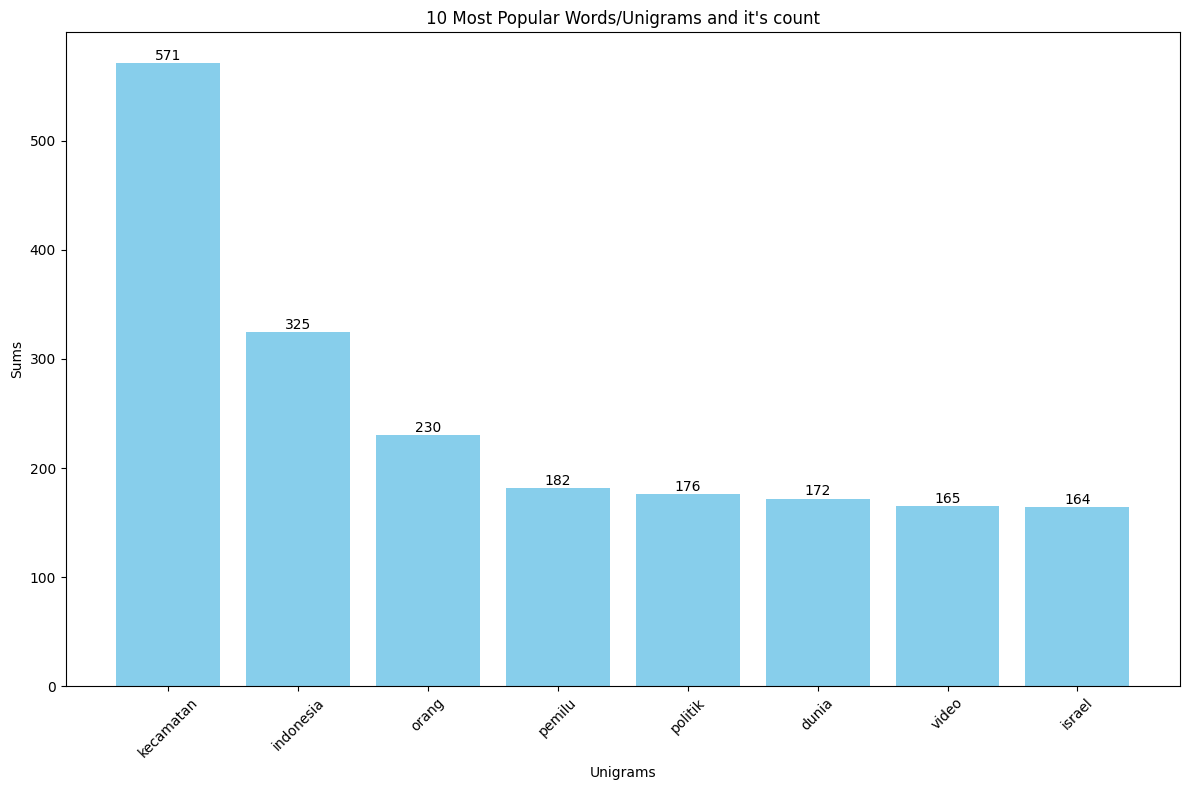

In [399]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(new_df['Clean_text'])
CVec = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
column_sums = CVec.sum()

# Rank the top 3 sums for each column
top10_words_freq = column_sums.nlargest(8)
plt.figure(figsize=(12, 8))
bars = plt.bar(top10_words_freq.index, top10_words_freq.values, color='skyblue')
plt.title("10 Most Popular Words/Unigrams and it's count")
plt.xlabel("Unigrams")
plt.ylabel("Sums")
plt.xticks(rotation=45)

# Display counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

bigram

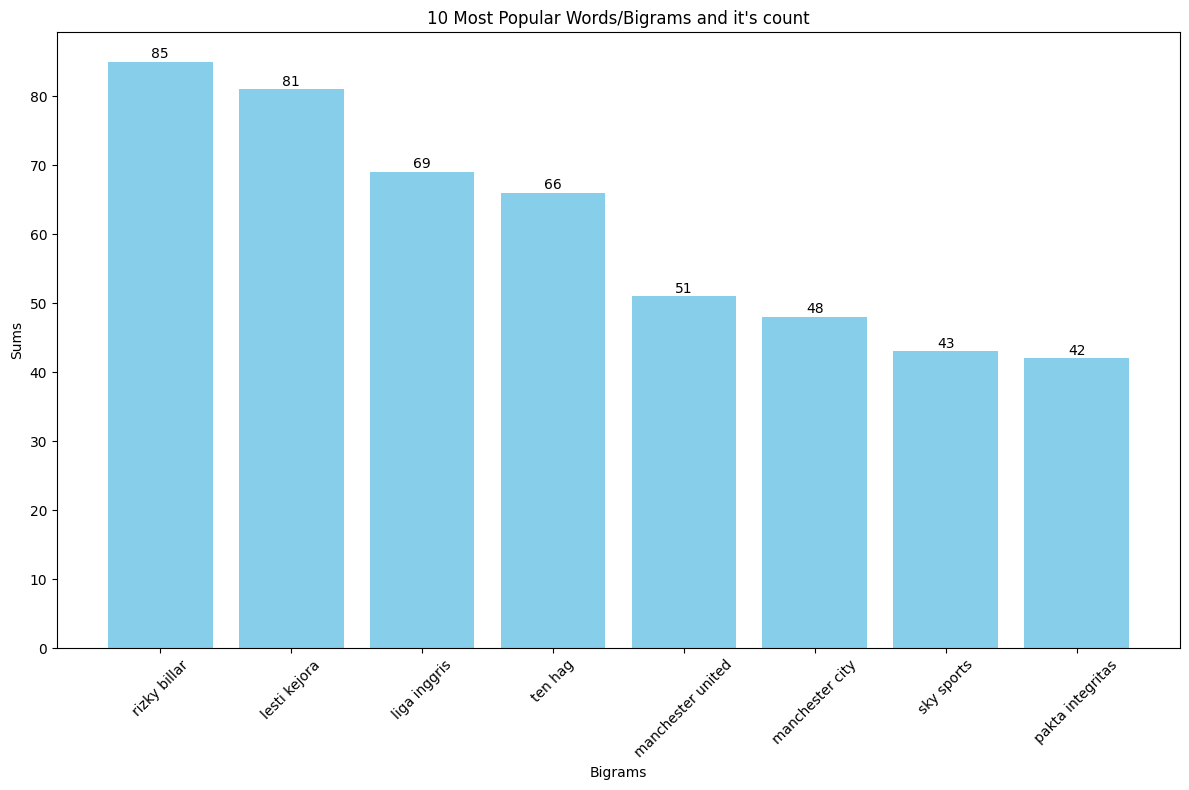

In [398]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(new_df['Clean_text'])
CVec = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
column_sums = CVec.sum()

# Rank the top 3 sums for each column
top10_words_freq = column_sums.nlargest(8)
plt.figure(figsize=(12, 8))
bars = plt.bar(top10_words_freq.index, top10_words_freq.values, color='skyblue')
plt.title("10 Most Popular Words/Bigrams and it's count")
plt.xlabel("Bigrams")
plt.ylabel("Sums")
plt.xticks(rotation=45)

# Display counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Mengidentifikasi istilah-istilah yang paling penting (most important terms) berdasarkan skor TF-IDF mereka

In [388]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(x_train)

In [389]:
# Create a DataFrame with the top TF-IDF terms
terms = vectorizer.get_feature_names_out()
tfidf_values = tfidf_matrix.sum(axis=0).A1
tfidf_df = pd.DataFrame({'Term': terms, 'TF-IDF Score': tfidf_values})

# Sort the DataFrame by TF-IDF scores in descending order
tfidf_df = tfidf_df.sort_values(by='TF-IDF Score', ascending=False)

# Display the top terms
print(tfidf_df.head(10))


            Term  TF-IDF Score
5901          mu      5.377729
3300   indonesia      5.071059
3416      israel      4.832608
2890         gol      4.461475
1402        city      4.354725
6581      pemilu      4.131677
4580        liga      4.019788
4432        laga      3.962239
4769  manchester      3.752373
9193      united      3.674393


**Model fitting dan evaluasi dengan best parameters**

base model

In [391]:
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('svm', SVC())
])

#2. fit with X_train and y_train
clf.fit(x_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test, y_pred, target_names=["Politik", "Hiburan", "Olahraga"]))

              precision    recall  f1-score   support

     Politik       0.95      0.95      0.95        20
     Hiburan       0.82      0.90      0.86        20
    Olahraga       0.94      0.85      0.89        20

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



hyperparamter tunning

In [392]:
# using random search cause it faster when compares to grid search

from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create a pipeline object
classifier = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('svm', SVC())
])

# Define the parameter distribution for random search
param_distributions = {
    'vectorizer_tfidf__max_features': [5000, 10000, None],
    'vectorizer_tfidf__ngram_range': [(1, 1), (1, 2)],
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__degree': [2, 3, 4]  # This parameter is only effective when kernel is 'poly'
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(classifier, param_distributions, cv=5, verbose=2, n_jobs=-1)

# Fit the model with X_train and y_train
random_search.fit(x_train, y_train)

# Get the best parameters from the random search
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Get the predictions for X_test and store it in y_pred
y_pred = random_search.predict(x_test)

# Print the classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Politik", "Hiburan", "Olahraga"]))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'vectorizer_tfidf__ngram_range': (1, 2), 'vectorizer_tfidf__max_features': 10000, 'svm__kernel': 'linear', 'svm__degree': 2, 'svm__C': 10}

 Classification Report:
              precision    recall  f1-score   support

     Politik       1.00      0.95      0.97        20
     Hiburan       0.86      0.90      0.88        20
    Olahraga       0.90      0.90      0.90        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



**Conclusion!!!**

Kombinasi SVM dan TF-IDF memberikan hasil yang menjanjikan dalam task text classification yang dimana base model, dengan menggunakan parameter default untuk SVM dan TF-IDF, dapat mencapai akurasi 90%. Lalu peningkatan performa model dicapai melalui hyperparameter tuning dan randomized search. Model yang telah di tunning dengan menggunakan best parameters, menunjukkan kinerja yang lebih baik, dimana mencapai akurasi 92%. Peningkatan akurasi ini menunjukkan efektivitas hyperparameter tuning dalam meningkatkan kinerja model.
